In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_processed_filled.csv')

columns2drop = ['Unnamed: 0', 'track_id', 'artist_id']

tracks.drop(columns2drop, inplace=True, axis=1)

tracks.shape

(106486, 40)

In [3]:
tracks.head(20) #Display the first 5 objects of the dataset

,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International
0,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
1,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
2,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1
3,0,4,6,47632,2,0,3,74,343,7419,...,2008.0,11.0,26.0,3,2008,11,25,0,0,0
4,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
5,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
6,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
7,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
8,0,2,4,2710,13,0,2,10,523,9551,...,2008.0,11.0,26.0,3,2008,11,26,3,0,0
9,0,4,1,6073,7,0,0,9,1323,299,...,2008.0,11.0,26.0,3,2008,11,26,3,0,1


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106486 entries, 0 to 106485
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   album_comments                                          106486 non-null  int64  
 1   album_favorites                                         106486 non-null  int64  
 2   album_id                                                106486 non-null  int64  
 3   album_listens                                           106486 non-null  int64  
 4   album_tracks                                            106486 non-null  int64  
 5   album_type                                              106486 non-null  int64  
 6   artist_comments                                         106486 non-null  int64  
 7   artist_favorites                                        106486 non-null  int64  
 8   artist_location         

Split the dataset into 70% train and 30% test

In [5]:
class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'
attributes = [col for col in tracks.columns if col != class_name]
data = tracks.values
X, y = data[:, :-1].astype(int), data[:, -1].astype(int)
#print(X[[:,2][:,3]], X[:,3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(74540, 39) (74540,)
(31946, 39) (31946,)


In [6]:
def get_similarity_stats(labels_):
    hist, bins = np.histogram(labels_, bins=range(-1, len(set(labels_)) + 1))

    print('labels', dict(zip(bins, hist)))
    #print('silhouette', silhouette_score(train_data, labels_))
    
    l = list()
    for i in range(len(labels_)):
        lpred = abs(labels_[i])
        ltrue = tracks['Attribution-NonCommercial-ShareAlike 3.0 International'][i]
        if ltrue == lpred:
            l.append(ltrue)

    print('number of values rightly guessed', len(l))
    print('percentage of values rightly guessed', (len(l) / len(tracks['Attribution-NonCommercial-ShareAlike 3.0 International'])) * 100)

    print('number of 1s rightly guessed', len([x for x in l if x == 1]))
    print('percentage of 1s rightly guessed', (len([x for x in l if x == 1]) / len([x for x in tracks['Attribution-NonCommercial-ShareAlike 3.0 International'] if x == 1])) * 100)

    print('number of 0s rightly guessed', len([x for x in l if x == 0]))
    print('percentage of 0s rightly guessed', (len([x for x in l if x == 0]) / len([x for x in tracks['Attribution-NonCommercial-ShareAlike 3.0 International'] if x == 0])) * 100)
    print('------------------')

*DBSCAN*

In [7]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [8]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106486 entries, 0 to 106485
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   album_comments                                          106486 non-null  int64  
 1   album_favorites                                         106486 non-null  int64  
 2   album_id                                                106486 non-null  int64  
 3   album_listens                                           106486 non-null  int64  
 4   album_tracks                                            106486 non-null  int64  
 5   album_type                                              106486 non-null  int64  
 6   artist_comments                                         106486 non-null  int64  
 7   artist_favorites                                        106486 non-null  int64  
 8   artist_location         

Box Plot

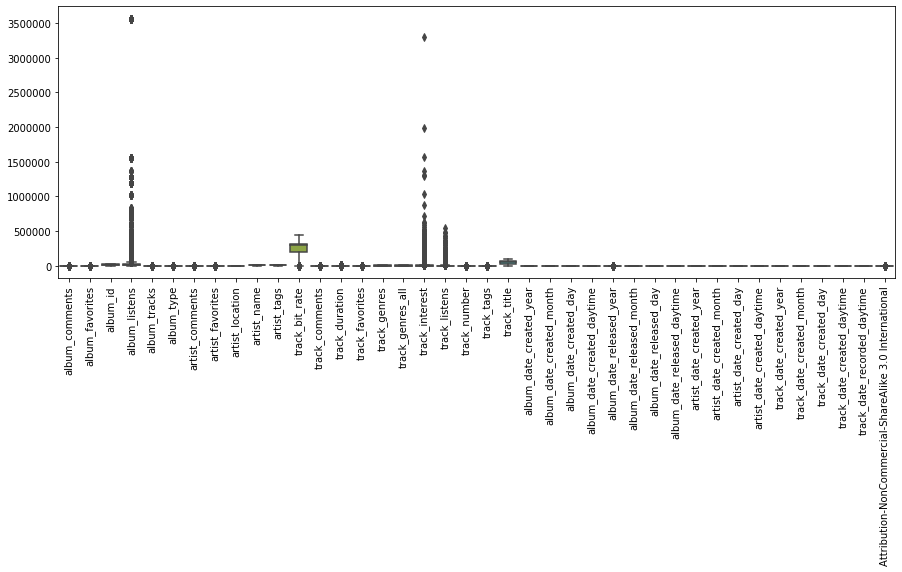

In [9]:
# Variable distribution

plt.subplots(figsize=(15,5))

sns.boxplot(data=tracks)
plt.xticks(rotation=90)
plt.show()

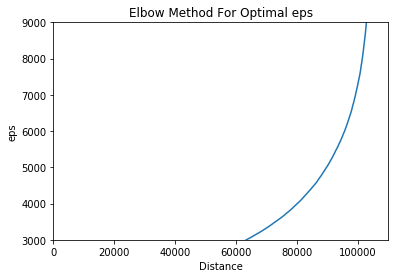

<Figure size 432x288 with 0 Axes>

In [142]:
neighbors = NearestNeighbors(n_neighbors=80)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim([3000, 9000])
plt.xlim([0, 110000])
plt.xlabel('Distance')
plt.ylabel('eps')
plt.title('Elbow Method For Optimal eps')
plt.show()
plt.savefig('dbscan_plot_dbscan.png')
plt.show()

In [ ]:
print('DBSCAN')

eps_vals = [4000,5000,6000,7000,8000,9000]
#eps_vals = [2.6]

for epss in eps_vals:
    dbscan = DBSCAN(eps=epss, min_samples=80)
    dbscan.fit(data)
    
    hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
    print('eps',epss,'labels', dict(zip(bins, hist)))

DBSCAN


In [144]:
eps_vals = [4000,5000,6000,7000,8000,9000]
dbscan = DBSCAN(eps=eps_vals[0], min_samples=40)
dbscan.fit(data)

get_similarity_stats(dbscan.labels_)

dbscan = DBSCAN(eps=eps_vals[1], min_samples=40)
dbscan.fit(data)

get_similarity_stats(dbscan.labels_)

dbscan = DBSCAN(eps=eps_vals[2], min_samples=40)
dbscan.fit(data)

get_similarity_stats(dbscan.labels_)

dbscan = DBSCAN(eps=eps_vals[3], min_samples=40)
dbscan.fit(data)

get_similarity_stats(dbscan.labels_)

dbscan = DBSCAN(eps=eps_vals[4], min_samples=40)
dbscan.fit(data)

get_similarity_stats(dbscan.labels_)

dbscan = DBSCAN(eps=eps_vals[5], min_samples=40)
dbscan.fit(data)

get_similarity_stats(dbscan.labels_)

labels {-1: 94129, 0: 117, 1: 594, 2: 156, 3: 159, 4: 63, 5: 356, 6: 109, 7: 60, 8: 42, 9: 130, 10: 44, 11: 41, 12: 76, 13: 141, 14: 48, 15: 40, 16: 41, 17: 114, 18: 56, 19: 844, 20: 38, 21: 1855, 22: 402, 23: 167, 24: 29, 25: 1259, 26: 59, 27: 106, 28: 59, 29: 71, 30: 40, 31: 201, 32: 361, 33: 419, 34: 393, 35: 41, 36: 46, 37: 53, 38: 302, 39: 36, 40: 54, 41: 33, 42: 57, 43: 76, 44: 84, 45: 239, 46: 49, 47: 55, 48: 63, 49: 42, 50: 51, 51: 43, 52: 547, 53: 94, 54: 83, 55: 66, 56: 89, 57: 43, 58: 41, 59: 59, 60: 104, 61: 64, 62: 354, 63: 225, 64: 41, 65: 102, 66: 45, 67: 79, 68: 41, 69: 116, 70: 41, 71: 23, 72: 46, 73: 40, 74: 0}
number of values rightly guessed 13639
percentage of values rightly guessed 12.808256484420488
number of 1s rightly guessed 13549
percentage of 1s rightly guessed 88.78768020969856
number of 0s rightly guessed 90
percentage of 0s rightly guessed 0.09865608488808017
------------------
labels {-1: 65025, 0: 9609, 1: 564, 2: 109, 3: 54, 4: 140, 5: 120, 6: 80, 7: 1

In [145]:
dbscan = DBSCAN(eps=eps_vals[4], min_samples=40)
dbscan.fit(data)
cluster_0_idx = [x for x in range(len(dbscan.labels_)) if dbscan.labels_[x] == 0]
cluster_1_idx = [x for x in range(len(dbscan.labels_)) if dbscan.labels_[x] != 0]

df_cluster_0 = tracks[tracks.index.isin(cluster_0_idx)]
df_cluster_1 = tracks[tracks.index.isin(cluster_1_idx)]

In [148]:
print('original length of df_cluster_1', len(df_cluster_1))
print('original length of df_cluster_0', len(df_cluster_0))

df_cluster_1.loc[df_cluster_1['Attribution-NonCommercial-ShareAlike 3.0 International'] == 1]

original length of df_cluster_1 90656
original length of df_cluster_0 15830


,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International,scores,anomaly_Value
23,0,0,67,858,2,0,0,1,159,822,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
24,0,0,67,858,2,0,0,1,159,822,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
25,0,0,68,244,2,0,0,0,1592,848,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
26,0,0,68,244,2,0,0,0,1592,848,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
43,0,0,72,716,4,4,0,2,1592,1008,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104700,0,1,22432,20144,12,0,0,0,343,2262,...,13.0,3,2017,2,13,3,0,1,-0.109902,-1
104798,0,1,22432,20144,12,0,0,0,343,3683,...,15.0,0,2017,2,15,0,0,1,-0.109902,-1
104799,0,1,22432,20144,12,0,0,0,343,8561,...,15.0,0,2017,2,15,0,0,1,-0.109902,-1
104800,0,1,22432,20144,12,0,0,0,343,2164,...,15.0,0,2017,2,15,0,0,1,-0.109902,-1


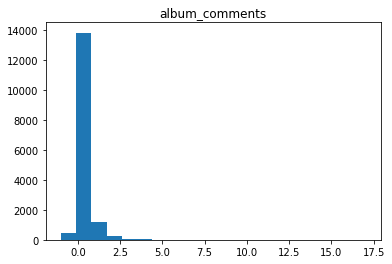

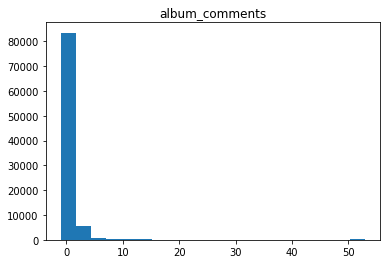

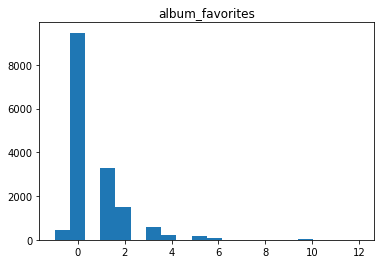

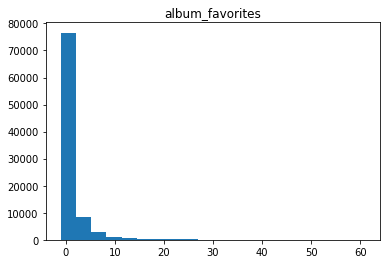

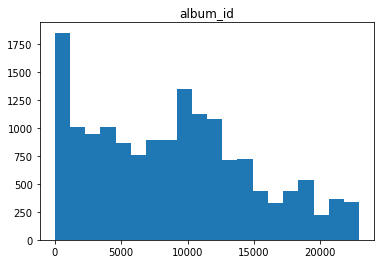

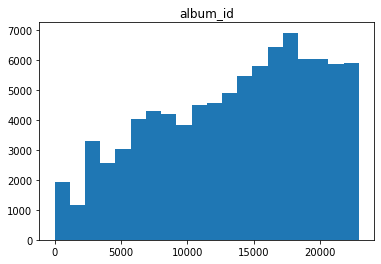

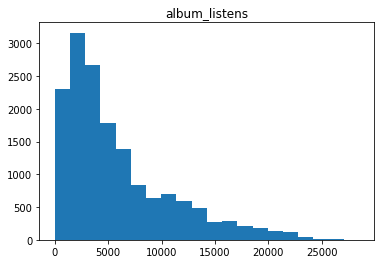

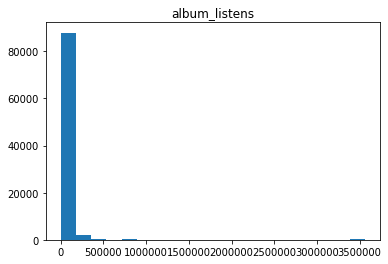

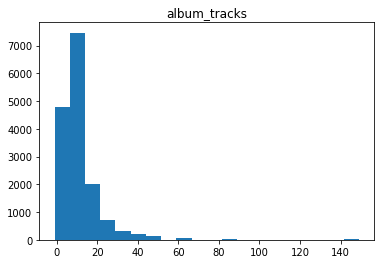

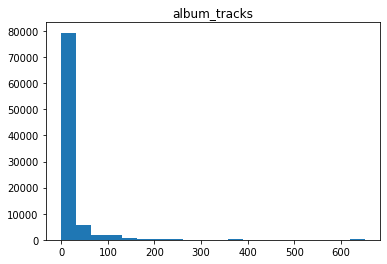

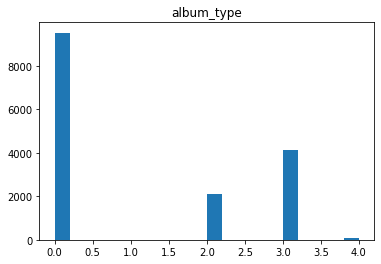

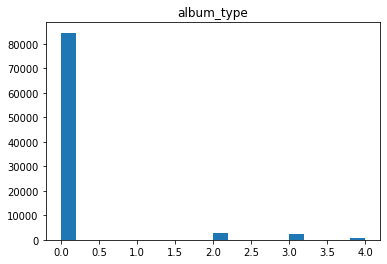

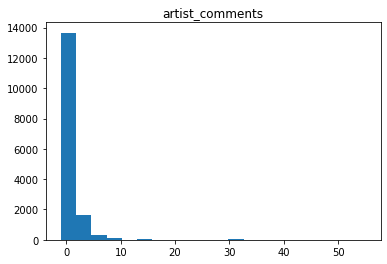

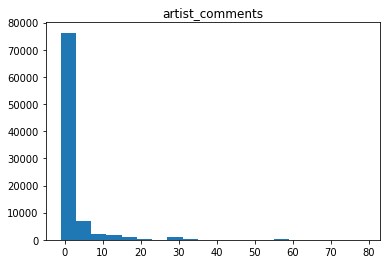

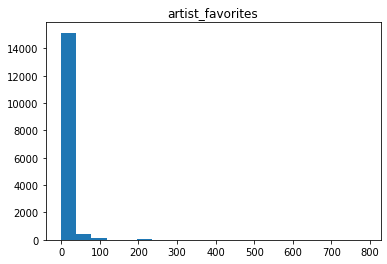

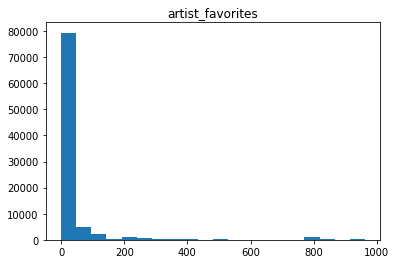

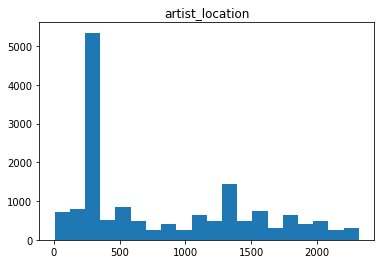

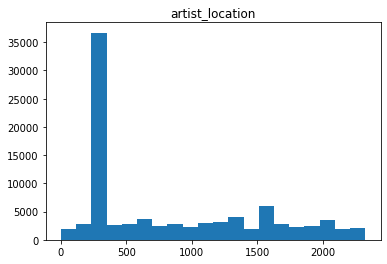

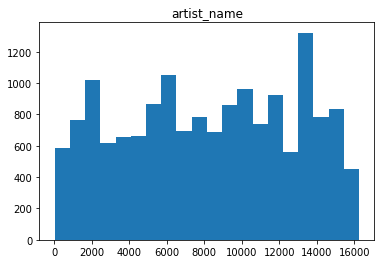

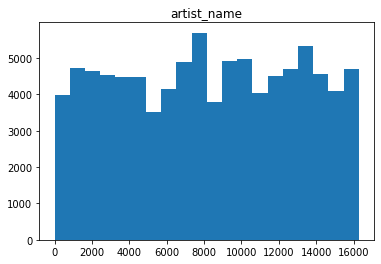

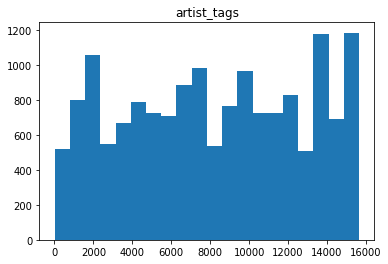

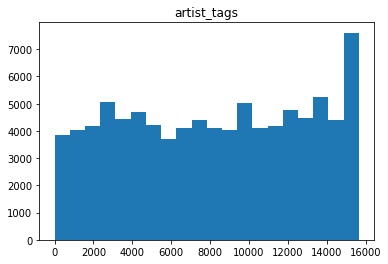

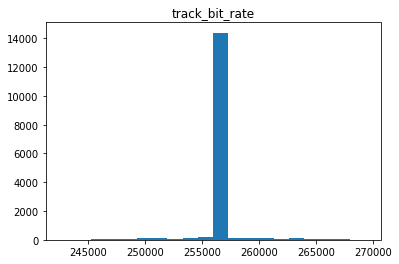

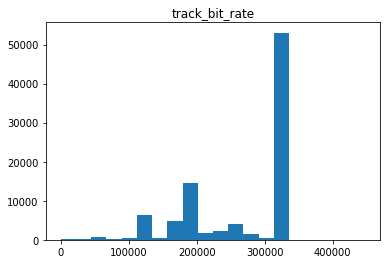

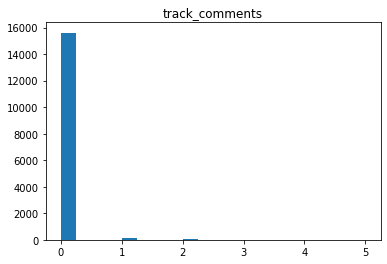

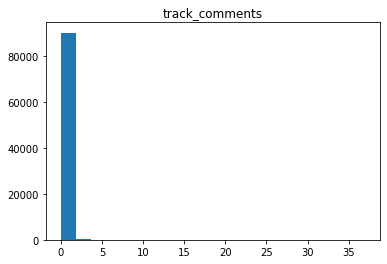

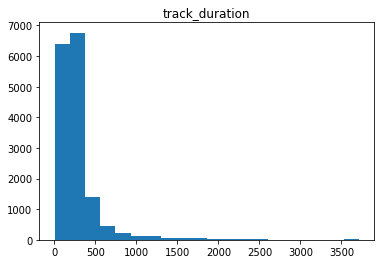

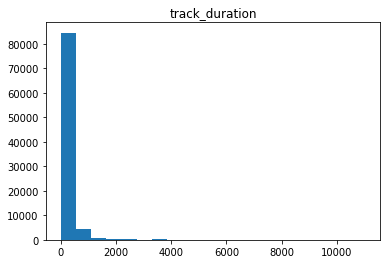

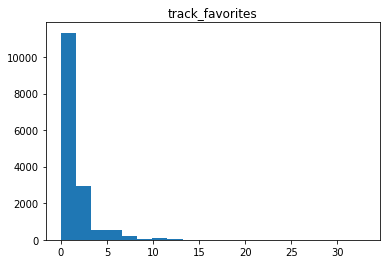

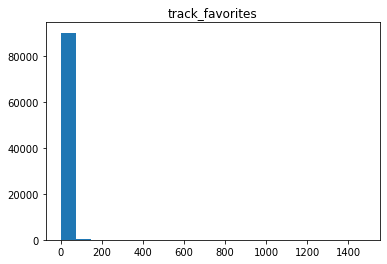

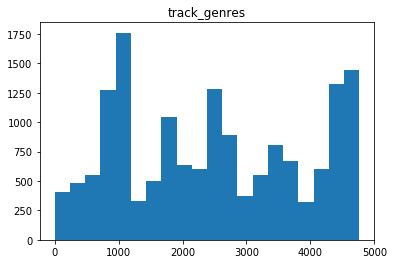

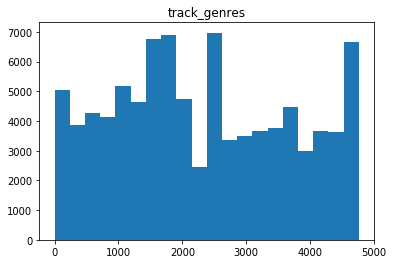

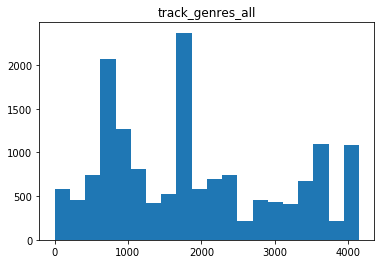

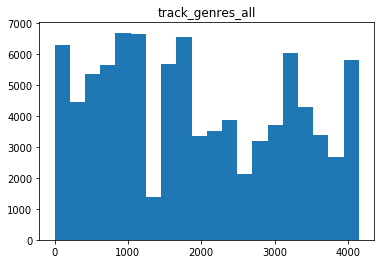

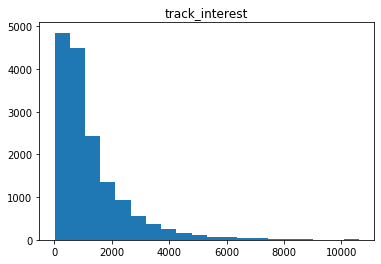

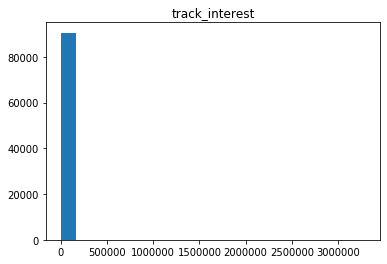

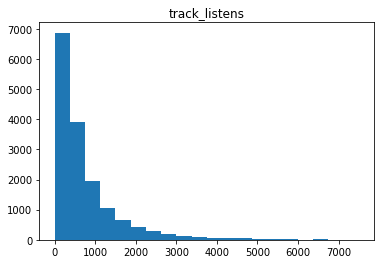

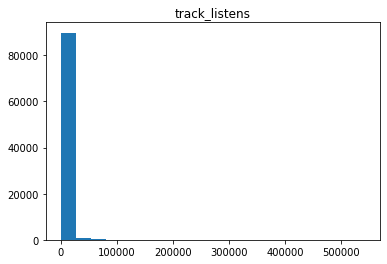

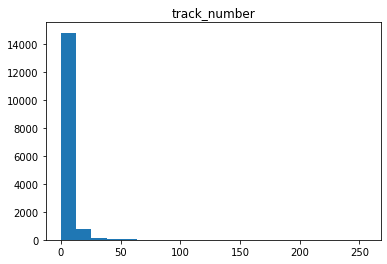

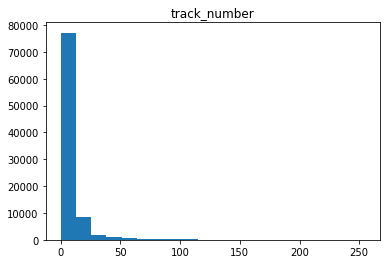

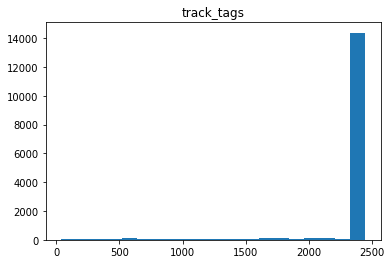

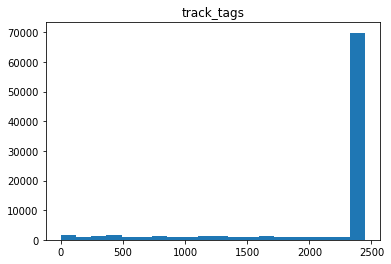

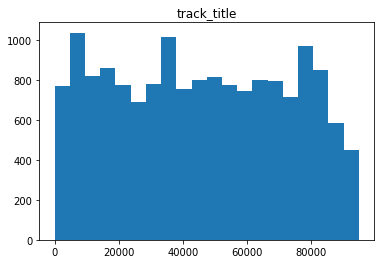

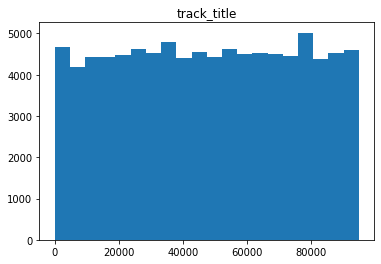

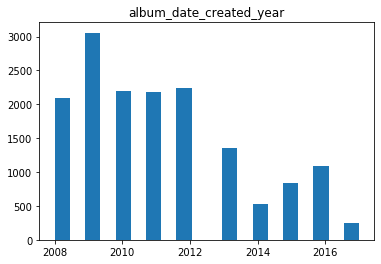

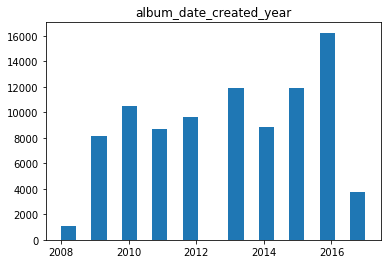

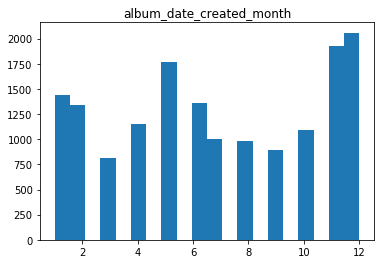

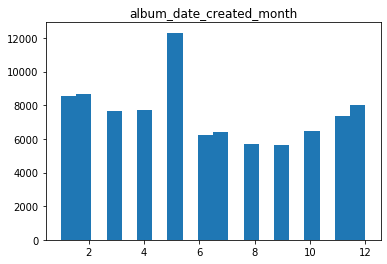

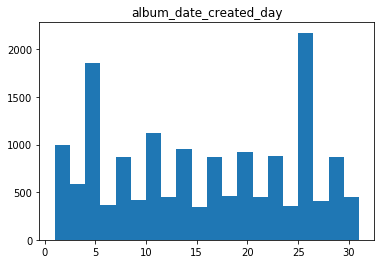

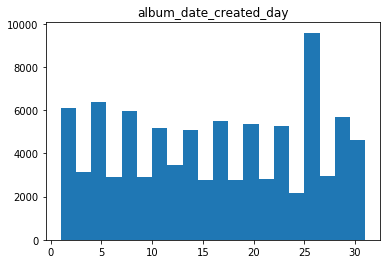

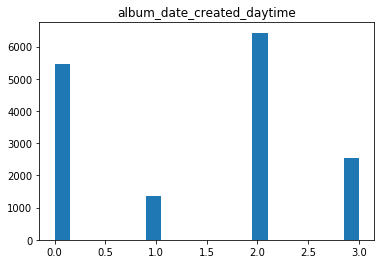

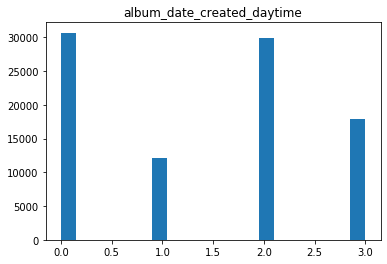

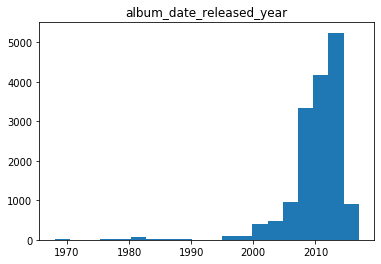

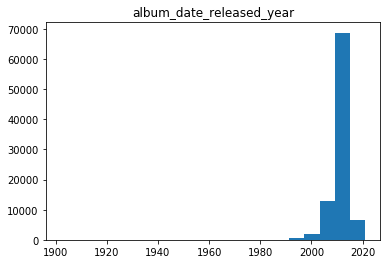

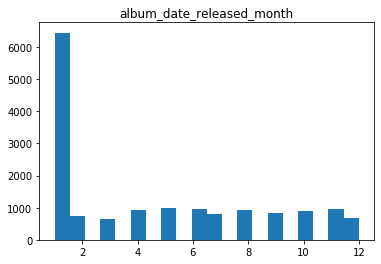

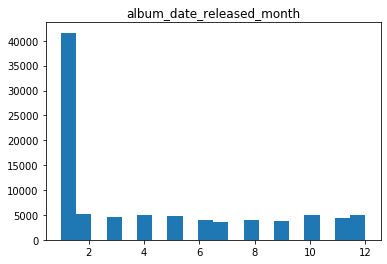

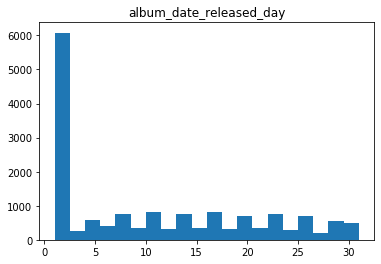

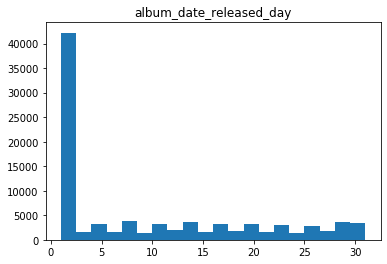

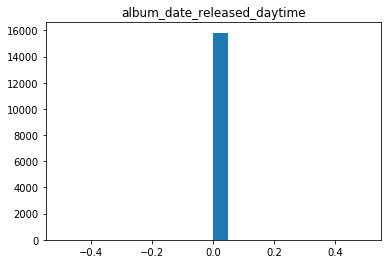

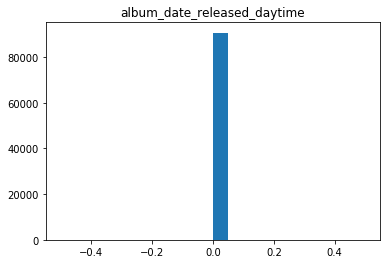

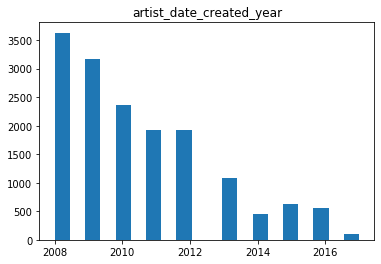

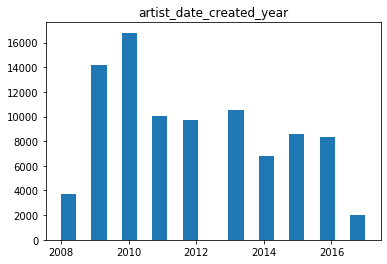

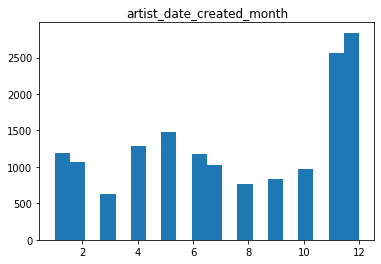

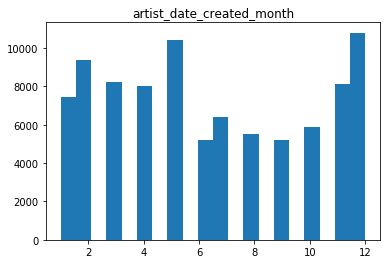

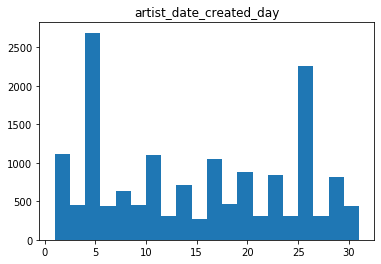

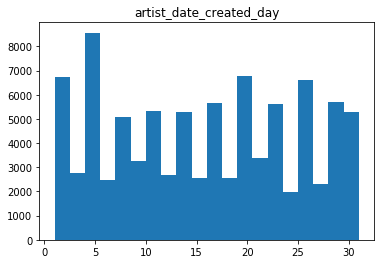

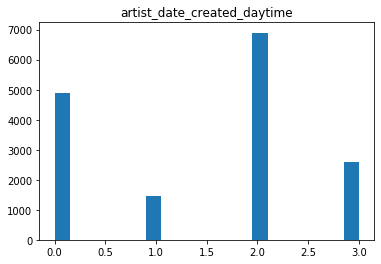

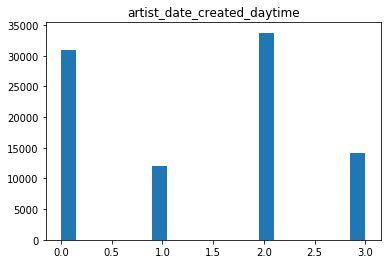

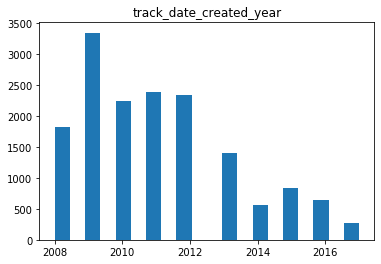

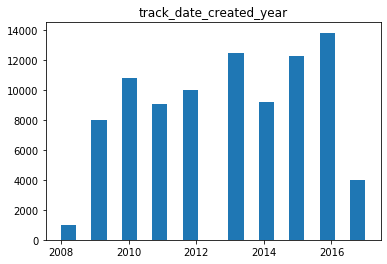

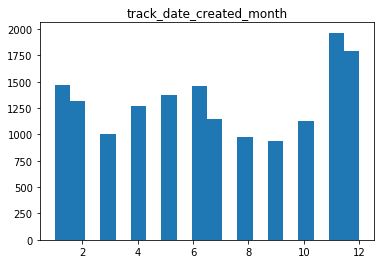

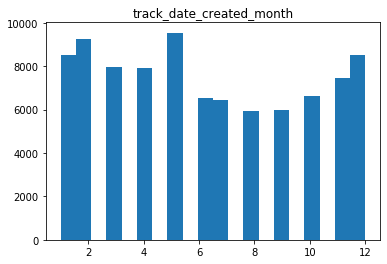

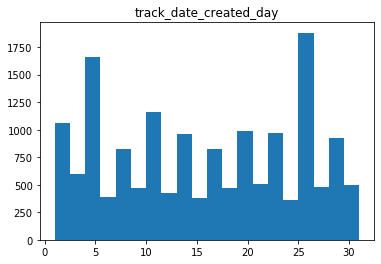

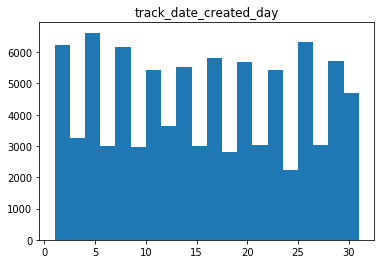

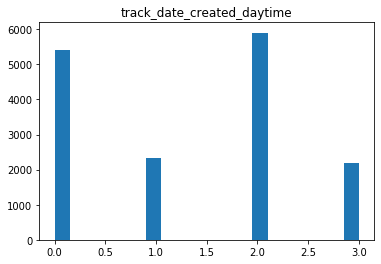

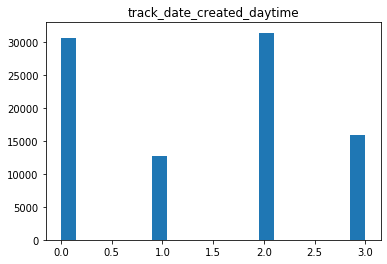

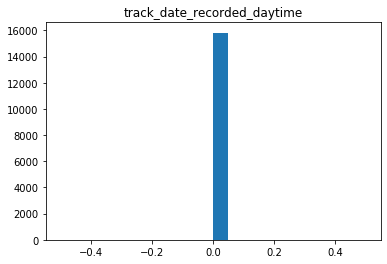

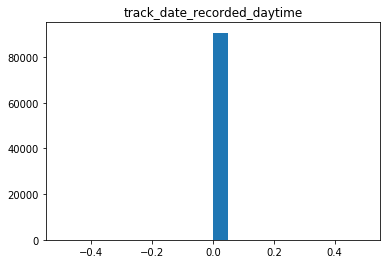

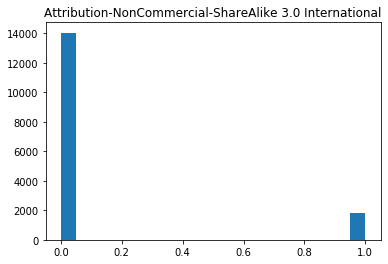

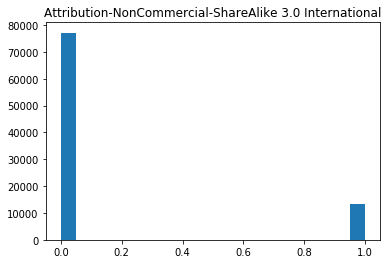

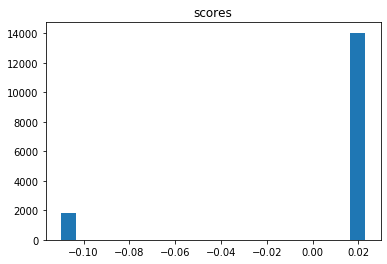

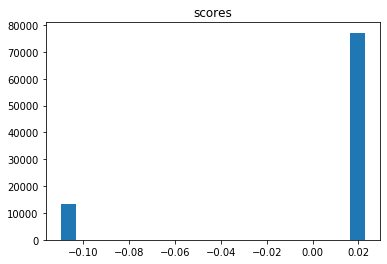

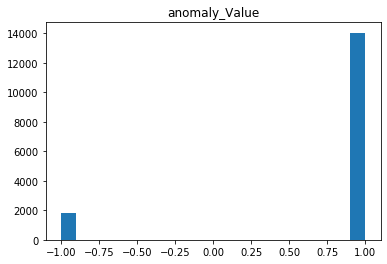

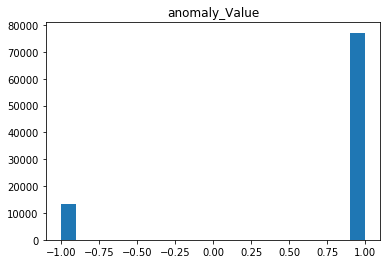

In [147]:
for col in df_cluster_0.columns:
    plt.hist(df_cluster_0[col], bins=20)
    plt.title(col)
    plt.show()
    
    plt.hist(df_cluster_1[col], bins=20)
    plt.title(col)
    plt.show()

*LOF*

In [11]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression

In [183]:
print(X_train.shape, y_train.shape)
clf = LocalOutlierFactor(n_neighbors=20, contamination=.03,metric='manhattan')
outliers = clf.fit_predict(X_train).astype(int)
# select all rows that are not outliers
mask = outliers != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
outliers = model.predict(X_test).astype(int)
# evaluate predictions
mae = mean_absolute_error(y_test, outliers)
print('MAE: %.3f' % mae)

(64008, 39) (64008,)
(62087, 39) (62087,)
MAE: 0.147


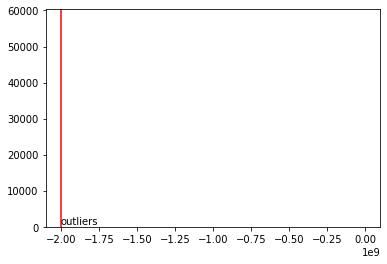

In [39]:
plt.hist(clf.negative_outlier_factor_, bins=10)
plt.axvline(-0.2*1e10, c='r')
plt.text(-0.2*1e10, 600, 'outliers')
plt.show()

In [40]:
np.where(outliers==-1)

(array([11221, 28088, 29375], dtype=int64),)

In [41]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-1.0070354876436307

In [185]:
clf = clf.negative_outlier_factor_
clf

array([-1.0046197 , -0.9824478 , -1.00979224, ..., -1.0363154 ,
       -0.97301129, -1.12781214])

In [186]:
from numpy import quantile, where, random
thresh = quantile(clf, .04)
print(thresh)

-1.2122819067543977


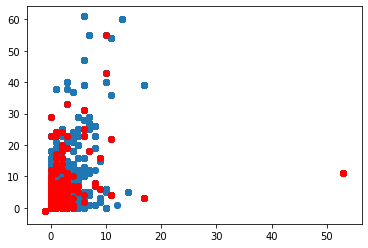

In [187]:
lofs_index = where(outliers==-1)
index = where(clf<=thresh)
values = X[index]
plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

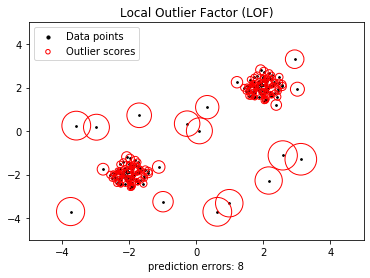

In [189]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

*ISOLATION FOREST*

In [46]:
from sklearn.ensemble import IsolationForest

In [79]:
clf=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(.2),max_features=1.0)
clf.fit(tracks[['Attribution-NonCommercial-ShareAlike 3.0 International']])

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.2,
        max_features=1.0, max_samples='auto', n_estimators=50, n_jobs=None,
        random_state=None, verbose=0)

In [89]:
tracks['scores']=clf.decision_function(tracks[['Attribution-NonCommercial-ShareAlike 3.0 International']])
tracks['anomaly_Value']=clf.predict(tracks[['Attribution-NonCommercial-ShareAlike 3.0 International']])
tracks.head(20)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International,scores,anomaly_Value
0,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
1,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
2,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
3,0,4,6,47632,2,0,3,74,343,7419,...,26.0,3,2008,11,25,0,0,0,0.022990,1
4,0,2,4,2710,13,0,2,10,523,9551,...,26.0,3,2008,11,26,3,0,0,0.022990,1
5,0,2,4,2710,13,0,2,10,523,9551,...,26.0,3,2008,11,26,3,0,0,0.022990,1
6,0,2,4,2710,13,0,2,10,523,9551,...,26.0,3,2008,11,26,3,0,0,0.022990,1
7,0,2,4,2710,13,0,2,10,523,9551,...,26.0,3,2008,11,26,3,0,0,0.022990,1
8,0,2,4,2710,13,0,2,10,523,9551,...,26.0,3,2008,11,26,3,0,0,0.022990,1
9,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1


In [85]:
anomaly=tracks.loc[tracks['anomaly_Value']==-1]
anomaly_index=list(anomaly.index)
anomaly

,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_location,artist_name,...,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International,scores,anomaly_Value
0,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
1,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
2,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
9,0,4,1,6073,7,0,0,9,1323,299,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
10,1,0,58,3331,4,4,1,0,343,332,...,26.0,3,2008,11,26,3,0,1,-0.109902,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104700,0,1,22432,20144,12,0,0,0,343,2262,...,13.0,3,2017,2,13,3,0,1,-0.109902,-1
104798,0,1,22432,20144,12,0,0,0,343,3683,...,15.0,0,2017,2,15,0,0,1,-0.109902,-1
104799,0,1,22432,20144,12,0,0,0,343,8561,...,15.0,0,2017,2,15,0,0,1,-0.109902,-1
104800,0,1,22432,20144,12,0,0,0,343,2164,...,15.0,0,2017,2,15,0,0,1,-0.109902,-1


In [90]:
outliers_counter = len(tracks[tracks['album_listens'] > 2000])
outliers_counter

90469

In [91]:
print("Accuracy percentage:", 100*list(tracks['anomaly_Value']).count(-1)/(outliers_counter))

Accuracy percentage: 16.86765632426577


PyOD

In [92]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.auto_encoder import AutoEncoder

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

ABOD

In [190]:
clf = ABOD(method="fast")
attributes = [col for col in tracks.columns if col != class_name]
X = tracks[attributes].values
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [191]:
clf.decision_scores_

array([-1.02744704e-16, -1.98478815e-15, -9.76026329e-16, ...,
       -1.59000043e-15, -5.55526328e-15, -1.00151658e-15])

In [196]:
from scipy import stats
import matplotlib.font_manager
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
outlier_fraction = 0.1
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}
#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

No of Errors :  Angle-based Outlier Detector (ABOD) True


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


ValueError: query data dimension must match training data dimension

<Figure size 720x720 with 0 Axes>

In [ ]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores
y_test_pred = clf.predict(X_test) # binary labels
y_test_scores = clf.decision_function(X_test) # raw outlier scores
y_test_proba = clf.predict_proba(X_test) # outlier probability
print("\nOn Training Data:")
evaluate_print("ABOD", y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print("ABOD", y_test, y_test_scores)
#visualize("ABOD",X_train, y_train, X_test, y_test, y_train_pred,
 #         y_test_pred, show_figure=True, save_figure=False)

KNN

In [177]:
clf_knn = KNN(contamination=0.5, n_neighbors = 15,n_jobs=-1)

clf_knn.fit(X_train)

KNN(algorithm='auto', contamination=0.5, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
  radius=1.0)

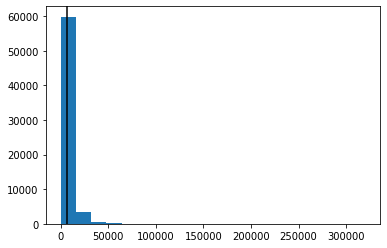

In [174]:
outliers = clf_knn.predict(X_train)
plt.hist(clf_knn.decision_scores_, bins=20)
plt.axvline(np.min(clf_knn.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [178]:
# Get the prediction labels of the training data 
y_train_pred = clf_knn.labels_ # binary labels (0: inliers, 1: outliers) 
# Outlier scores 
y_train_scores = clf_knn.decision_scores_

In [179]:
evaluate_print('KNN', y_train, y_train_scores)

KNN ROC:0.4827, precision @ rank n:0.1043


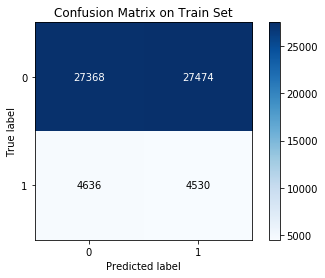

In [180]:
import scikitplot as skplt 
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False,title="Confusion Matrix on Train Set")
plt.show()

In [181]:
y_test_scores = clf_knn.decision_function(X_test)  # outlier scores

# Evaluate on the training data
evaluate_print('KNN', y_test,y_test_scores)

KNN ROC:0.4888, precision @ rank n:0.1103


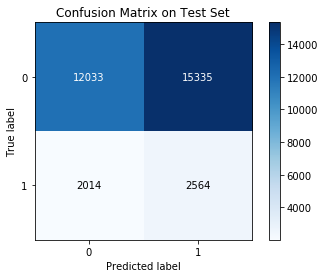

In [182]:
# plot the comfusion matrix  in the test set
y_preds = clf_knn.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize=False,
                                    title="Confusion Matrix on Test Set")
plt.show()